# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Build a decision tree using the target variable Sale as the dependent variable by converting it to a categorical variable.
---

## Data Description

Feature | Description
:-: | :-:
Sales | Unit sales (in thousands) at each location
Competitor Price | Price charged by competitor at each location
Income | Community income level (in thousands of dollars)
Advertising | Local advertising budget for company at each location (in thousands of dollars)
Population | Population size in region (in thousands)
Price | Price company charges for car seats at each site
Shelf Location at stores | A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age | Average age of the local population
Education | Education level at each location
Urban | A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US | A factor with levels No and Yes to indicate whether the store is in the US or not

## Data Gathering

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [172]:
# Loading the dataset
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Getting unique values for each feature
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

Urban, US, ShelveLoc are categorical features

In [5]:
# Checking na values
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

No na values

<Axes: xlabel='Sales', ylabel='Count'>

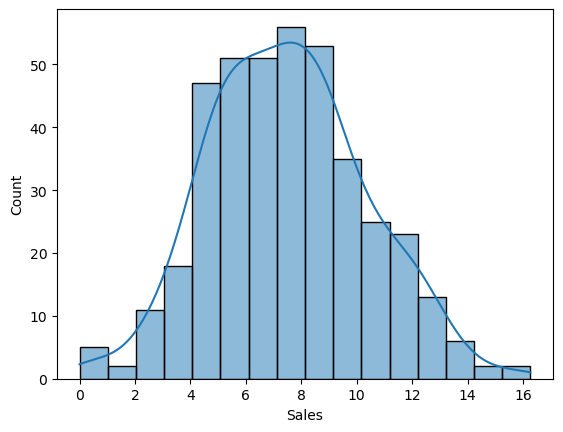

In [6]:
# Histogram for target variable
sns.histplot(df, x = 'Sales', kde = True)

We have to categorize this feature

<Axes: xlabel='CompPrice', ylabel='Count'>

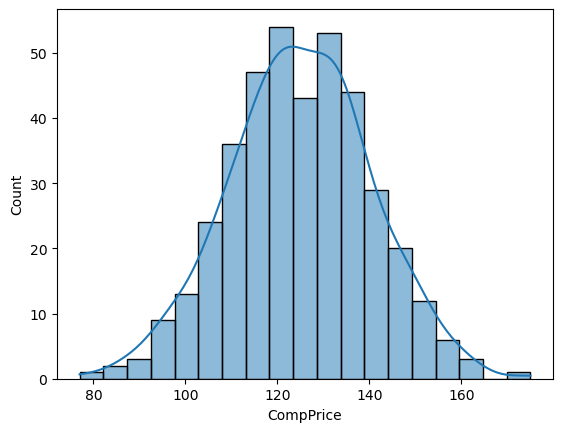

In [7]:
# Histogram for CompPrice
sns.histplot(df, x = 'CompPrice', kde = True)

<Axes: xlabel='Income', ylabel='Count'>

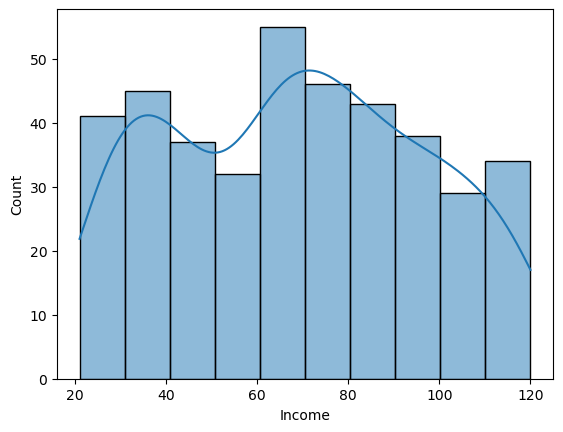

In [8]:
# Histogram for Income
sns.histplot(df, x = 'Income', kde = True)

<Axes: xlabel='Advertising', ylabel='Count'>

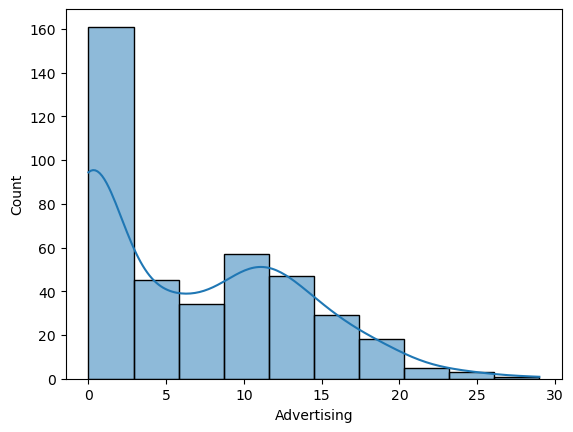

In [9]:
# Histogram for Advertising
sns.histplot(df, x = 'Advertising', kde = True)

<Axes: xlabel='Population', ylabel='Count'>

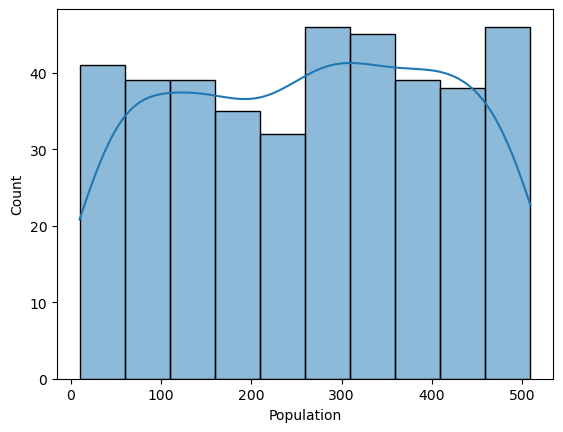

In [10]:
# Histogram for Population
sns.histplot(df, x = 'Population', kde = True)

<Axes: xlabel='Price', ylabel='Count'>

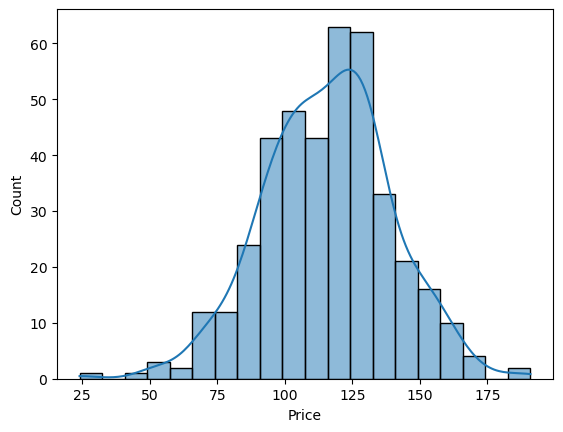

In [11]:
# Histogram for Price
sns.histplot(df, x = 'Price', kde = True)

<Axes: xlabel='ShelveLoc', ylabel='Count'>

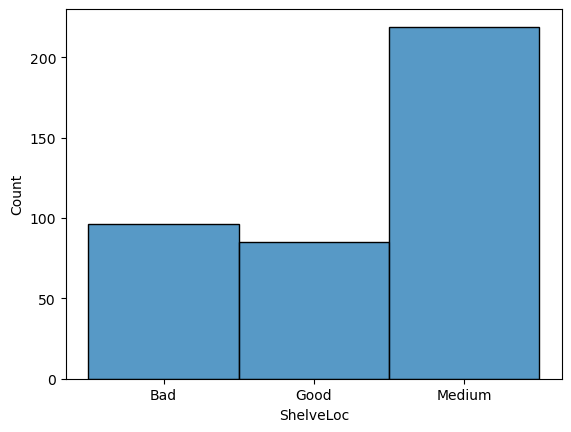

In [12]:
# Countplot for ShelveLoc
sns.histplot(df, x = 'ShelveLoc')

<Axes: xlabel='Age', ylabel='Count'>

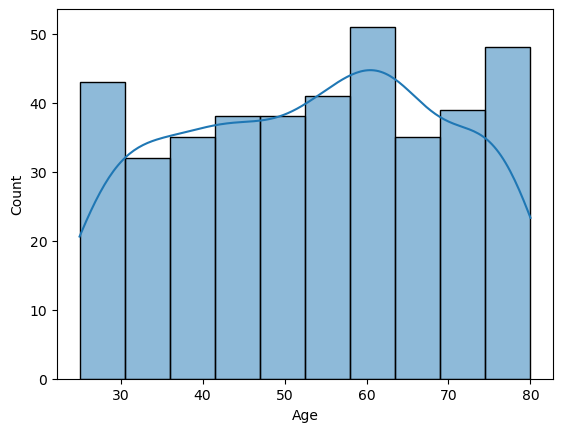

In [13]:
# Histogram for Age
sns.histplot(df, x = 'Age', kde = True)

<Axes: xlabel='Education', ylabel='count'>

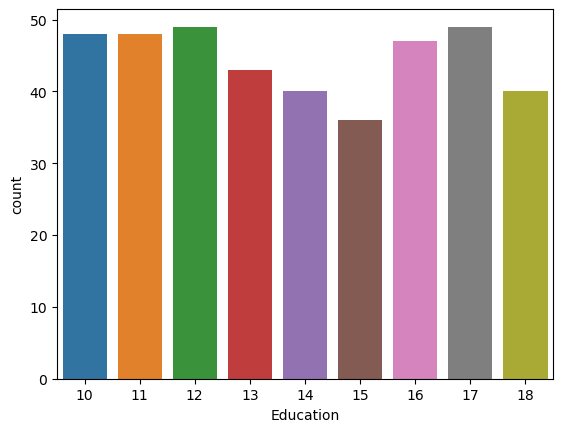

In [14]:
# countplot for Education
sns.countplot(df, x = 'Education')

Education is also a categorical feature

<Axes: xlabel='Urban', ylabel='count'>

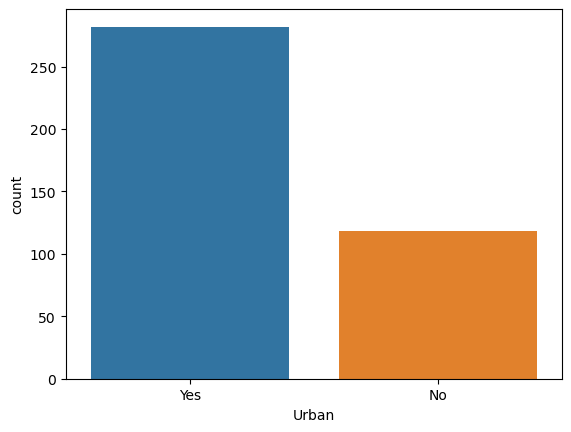

In [15]:
# countplot for Urban
sns.countplot(df, x = 'Urban')

<Axes: xlabel='US', ylabel='count'>

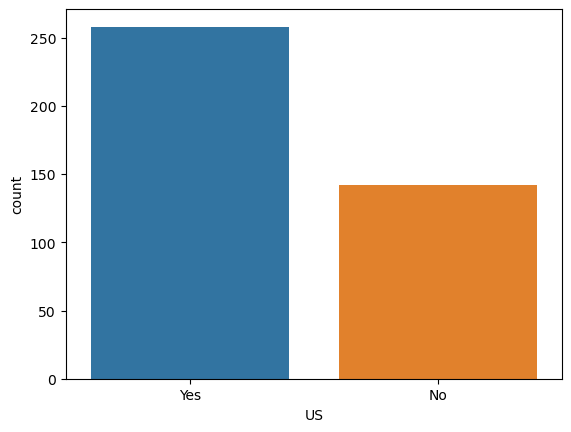

In [16]:
# countplot for US
sns.countplot(df, x = 'US')

## Feature Engineering

In [174]:
# Seperating Sales into 3 categories based on equal quantile ranges
df['Sales'] = pd.cut(df.Sales, bins = [-1, df.Sales.quantile(1/3), df.Sales.quantile(2/3), df.Sales.max() + 1], labels = ['Low', 'Medium', 'High'])

<Axes: xlabel='Sales', ylabel='count'>

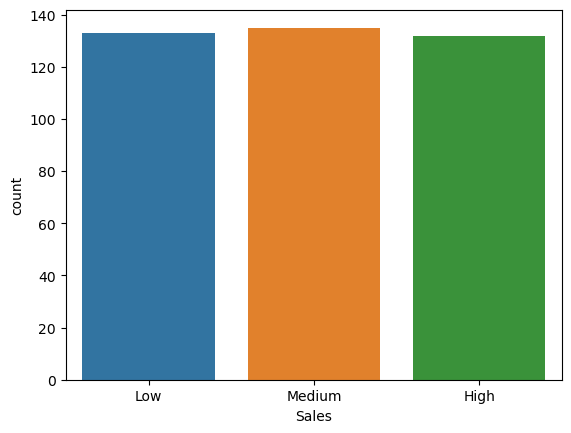

In [175]:
# Countplot for Sales
sns.countplot(df, x = 'Sales')

The target classes are balanced

In [176]:
# Label encoding categorical features
df.US.replace({'Yes':1, 'No':0}, inplace=True)
df.Urban.replace({'Yes':1, 'No':0}, inplace=True)
df.ShelveLoc.replace({'Good':2, 'Medium':1, 'Bad':0}, inplace=True)
df.Sales.replace({'High':2, 'Medium':1, 'Low':0}, inplace=True)

## Hyperparameter Tuning

In [177]:
# Splitting data into dependent and independent variables
X = df.drop(columns='Sales')
y = df.Sales

In [285]:
# Splitting into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X,y, random_state= 42)

In [286]:
# Creating a Decision Tree Classification object
dtc = DecisionTreeClassifier(random_state= 42)

In [287]:
# Fitting to training data
dtc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [288]:
# Accuracy for training data
dtc.score(train_X, train_y)

1.0

In [289]:
# Accuracy for testing data
dtc.score(test_X, test_y)

0.67

We get low accuracy for testing set. Our model is overfitting to the training data

In [290]:
# Getting the maximum value for depth
max_depth = dtc.get_depth()
max_depth

12

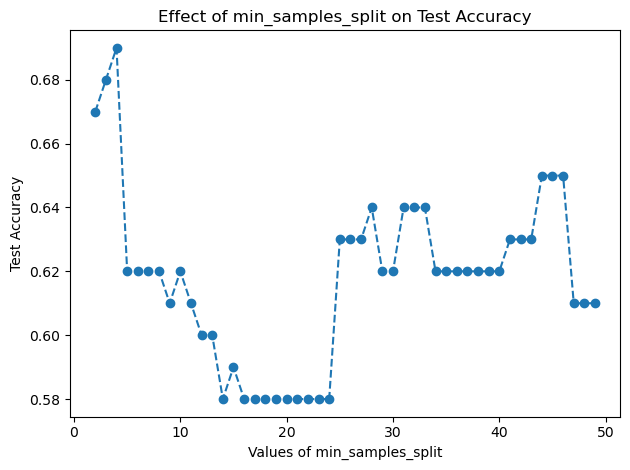

In [294]:
# Checking effect of min_samples_split hyperparameter
acc = []
mss = list(range(2, 50))
for i in mss:
    dtc = DecisionTreeClassifier(min_samples_split = i, random_state=42)
    dtc.fit(train_X, train_y)
    acc.append(dtc.score(test_X, test_y))
plt.plot(mss, acc, 'o--')
plt.xlabel('Values of min_samples_split')
plt.ylabel('Test Accuracy')
plt.title("Effect of min_samples_split on Test Accuracy")
plt.tight_layout()

We have highest test accuracy at value 4

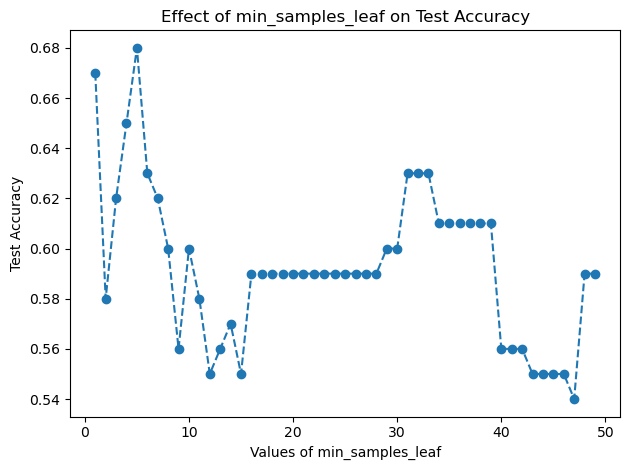

In [295]:
# Checking effect of min_samples_leaf hyperparameter
acc = []
msl = list(range(1, 50))
for i in msl:
    dtc = DecisionTreeClassifier(min_samples_leaf = i, random_state=42)
    dtc.fit(train_X, train_y)
    acc.append(dtc.score(test_X, test_y))
plt.plot(msl, acc, 'o--')
plt.xlabel('Values of min_samples_leaf')
plt.ylabel('Test Accuracy')
plt.title("Effect of min_samples_leaf on Test Accuracy")
plt.tight_layout()

At value 5, there is a spike in test accuracy

In [301]:
# Defining all values for hyperparameters
param_grid = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : [i for i in range(2, max_depth)],
    'min_samples_split' : [i for i in range(2, 20)],
    'min_samples_leaf' : [i for i in range(1, 10)], 
}

In [302]:
# Creating a grid search
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, verbose=1)

In [303]:
# Fitting to grid search
grid.fit(X,y)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=49,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [304]:
# Best score from grid
grid.best_score_

0.6375

In [305]:
# Hyperparameter values that gave the best score
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 15}

In [306]:
# Creating a Decision Tree Regressor object
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 15, random_state=42)

In [307]:
# Fitting to training data
dtc.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=15,
                       random_state=42)

In [308]:
# Accuracy for training data
dtc.score(train_X, train_y)

0.83

In [309]:
# Accuracy for testing data
dtc.score(test_X, test_y)

0.59

We can see that training and testing accuracy is not close. So there are signs of overfitting

[Text(0.6339285714285714, 0.9444444444444444, 'ShelveLoc <= 1.5\nentropy = 1.584\nsamples = 300\nvalue = [101, 103, 96]\nclass = Medium'),
 Text(0.3535714285714286, 0.8333333333333334, 'Price <= 105.5\nentropy = 1.545\nsamples = 239\nvalue = [99, 85, 55]\nclass = Low'),
 Text(0.15714285714285714, 0.7222222222222222, 'Age <= 49.5\nentropy = 1.506\nsamples = 79\nvalue = [15, 29, 35]\nclass = High'),
 Text(0.05714285714285714, 0.6111111111111112, 'Age <= 31.0\nentropy = 0.857\nsamples = 32\nvalue = [0, 9, 23]\nclass = High'),
 Text(0.02857142857142857, 0.5, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]\nclass = High'),
 Text(0.08571428571428572, 0.5, 'ShelveLoc <= 0.5\nentropy = 0.966\nsamples = 23\nvalue = [0, 9, 14]\nclass = High'),
 Text(0.05714285714285714, 0.3888888888888889, 'entropy = 0.592\nsamples = 7\nvalue = [0, 6, 1]\nclass = Medium'),
 Text(0.11428571428571428, 0.3888888888888889, 'Population <= 216.5\nentropy = 0.696\nsamples = 16\nvalue = [0, 3, 13]\nclass = High'),
 Text(

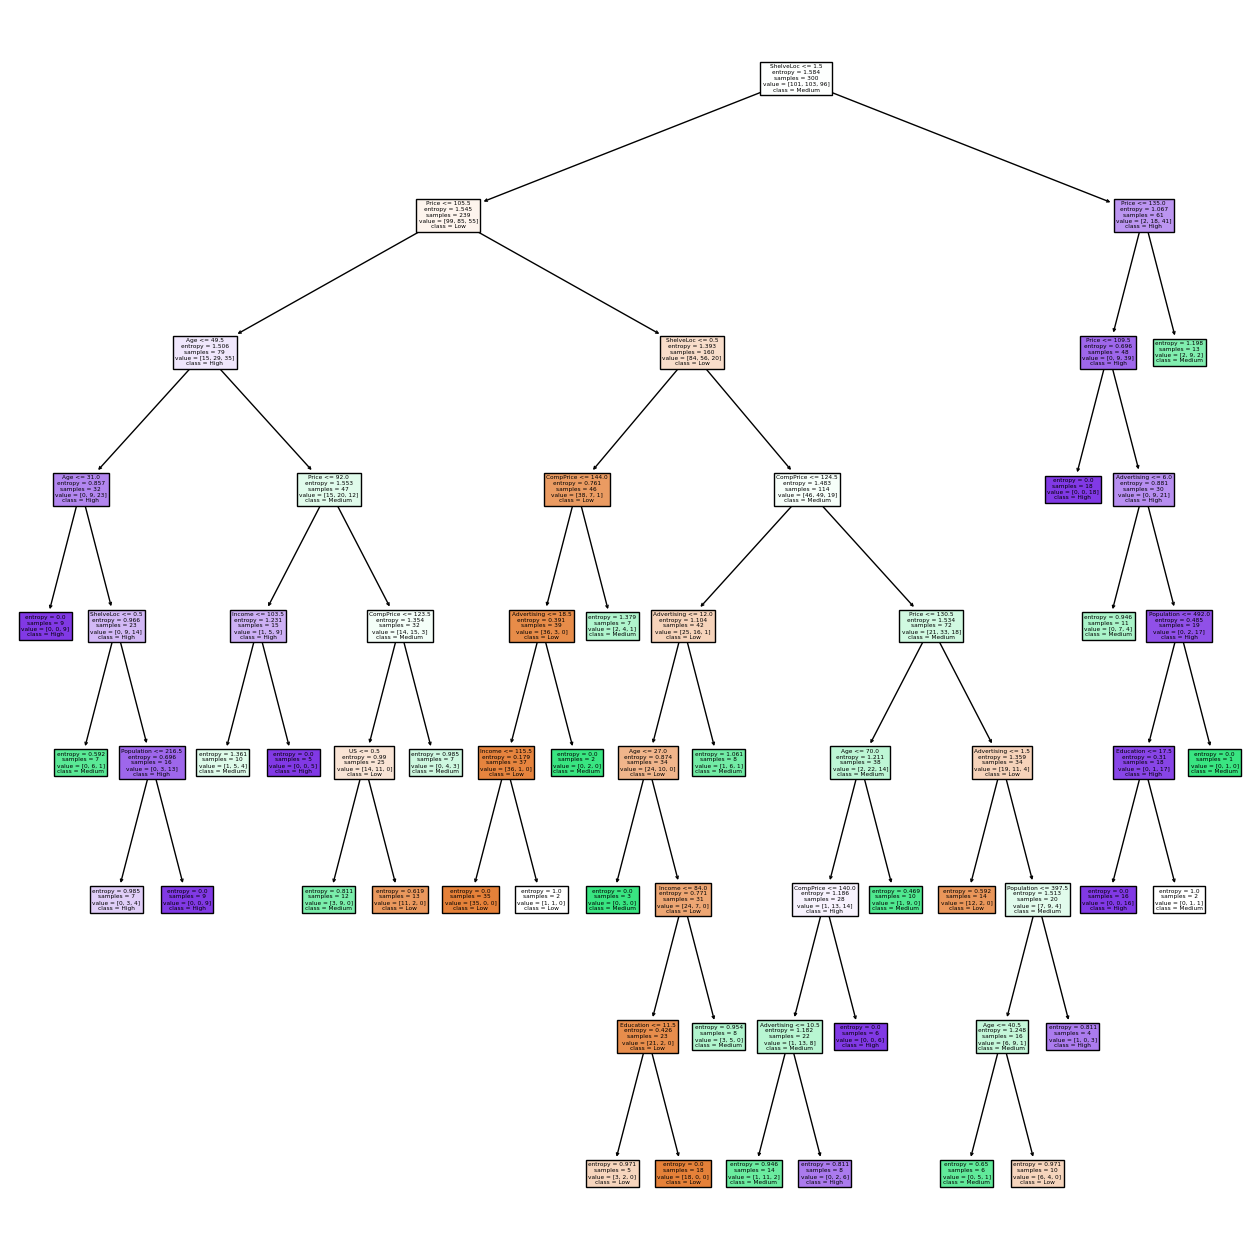

In [310]:
# Plotting the decision tree
plt.figure(figsize = (16,16))
plot_tree(dtc, feature_names = dtc.feature_names_in_, class_names = ['Low','Medium','High'], filled=True)

Let us see if we can improve accuracy with pruning

In [311]:
# Getting meaningful ccp_alpha values
ccp_alphas = dtc.cost_complexity_pruning_path(train_X, train_y).ccp_alphas

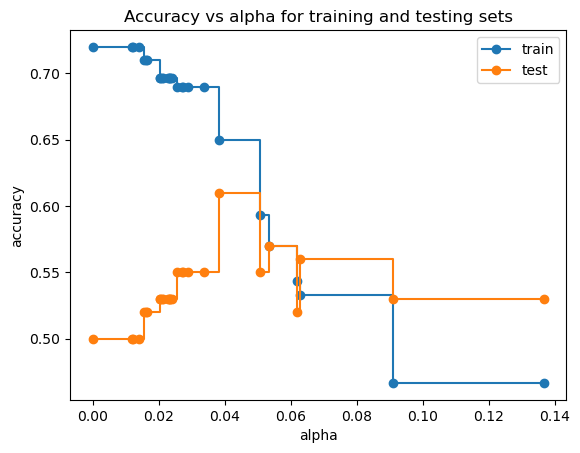

In [312]:
# Plotting Train and Test set accuracy for different values of alpha
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 13, min_samples_split = 20, ccp_alpha= ccp_alpha)
    clf.fit(train_X, train_y)
    train_scores.append(clf.score(train_X, train_y))
    test_scores.append(clf.score(test_X, test_y))

plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")

plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")

plt.legend()
plt.show()

We can see that test accuracy for ccp_alpha = 0.04 is the best.

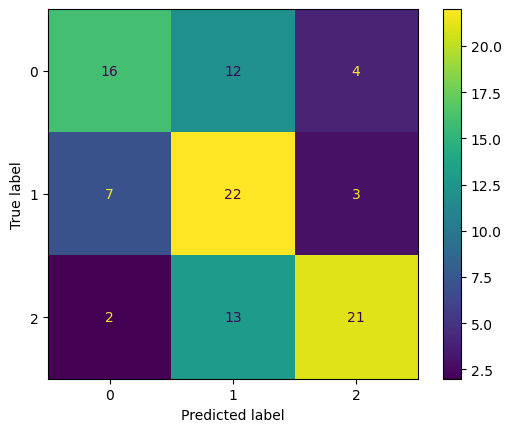

In [313]:
# Confusion matrix for 0 alpha
ConfusionMatrixDisplay(confusion_matrix(test_y, dtc.predict(test_X))).plot()

We can see there are a lot of errors, especially with Medium being misclassified as Low

In [316]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 15, random_state=42, ccp_alpha=ccp_alphas[-7])

In [317]:
dtc.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.038172544598031224, criterion='entropy',
                       max_depth=10, min_samples_split=15, random_state=42)

In [318]:
dtc.score(train_X, train_y)

0.65

In [319]:
dtc.score(test_X, test_y)

0.61

[Text(0.5909090909090909, 0.9166666666666666, 'ShelveLoc <= 1.5\nentropy = 1.584\nsamples = 300\nvalue = [101, 103, 96]\nclass = Medium'),
 Text(0.36363636363636365, 0.75, 'Price <= 105.5\nentropy = 1.545\nsamples = 239\nvalue = [99, 85, 55]\nclass = Low'),
 Text(0.18181818181818182, 0.5833333333333334, 'Age <= 49.5\nentropy = 1.506\nsamples = 79\nvalue = [15, 29, 35]\nclass = High'),
 Text(0.09090909090909091, 0.4166666666666667, 'entropy = 0.857\nsamples = 32\nvalue = [0, 9, 23]\nclass = High'),
 Text(0.2727272727272727, 0.4166666666666667, 'entropy = 1.553\nsamples = 47\nvalue = [15, 20, 12]\nclass = Medium'),
 Text(0.5454545454545454, 0.5833333333333334, 'ShelveLoc <= 0.5\nentropy = 1.393\nsamples = 160\nvalue = [84, 56, 20]\nclass = Low'),
 Text(0.45454545454545453, 0.4166666666666667, 'entropy = 0.761\nsamples = 46\nvalue = [38, 7, 1]\nclass = Low'),
 Text(0.6363636363636364, 0.4166666666666667, 'CompPrice <= 124.5\nentropy = 1.483\nsamples = 114\nvalue = [46, 49, 19]\nclass = Me

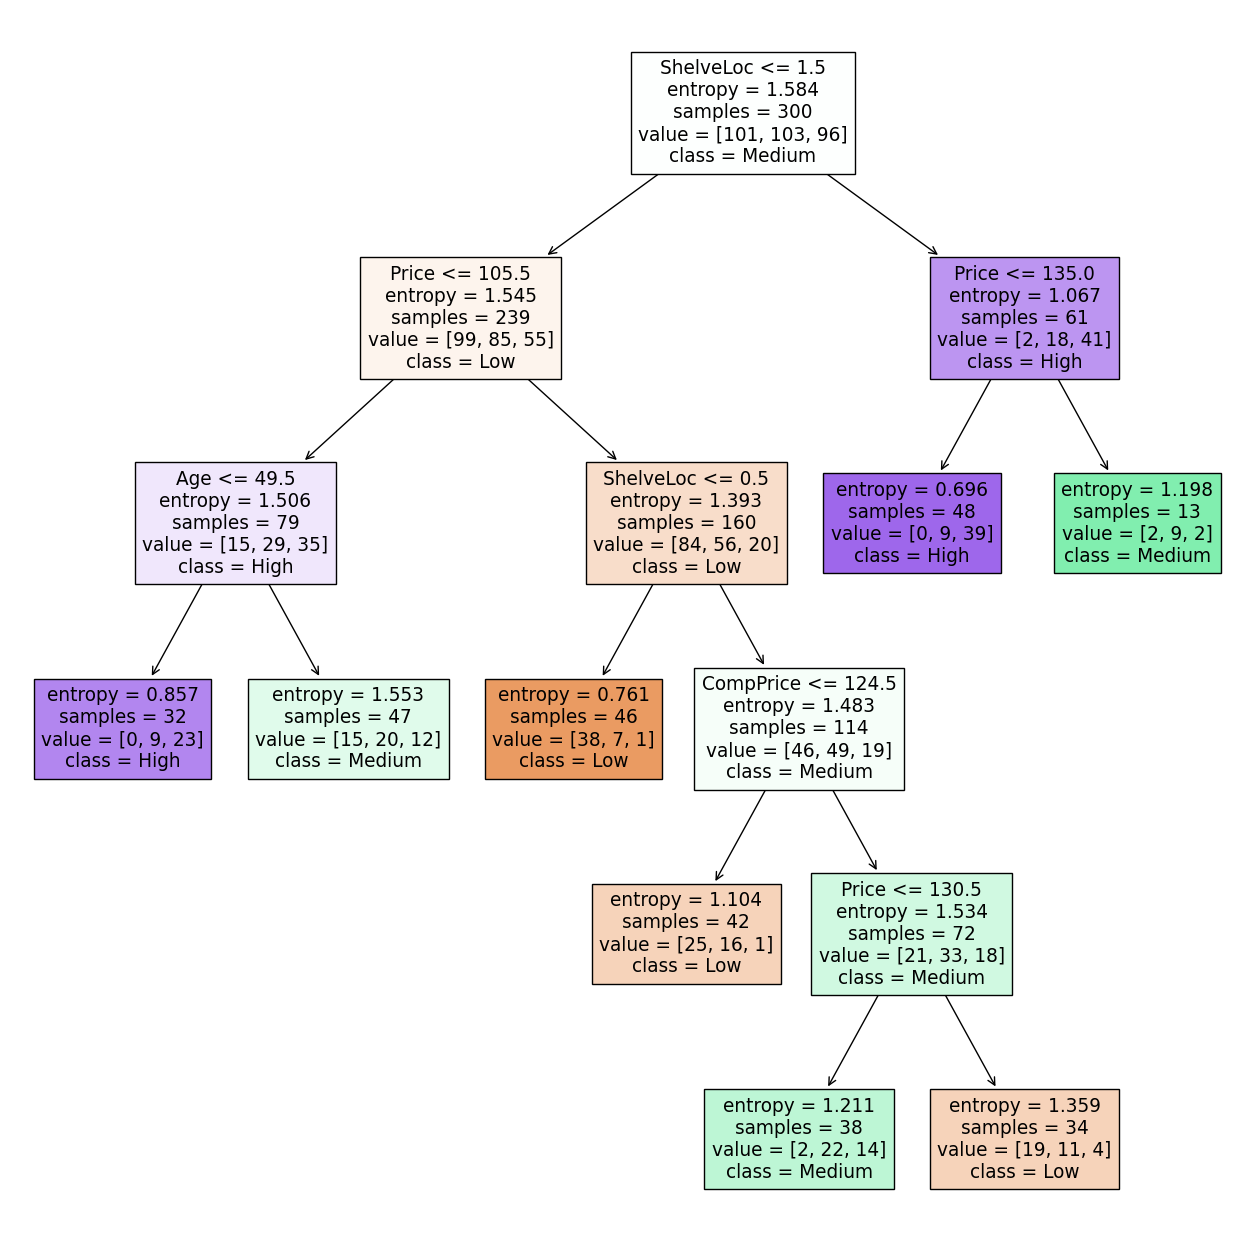

In [322]:
# Plotting the decision tree
plt.figure(figsize = (16,16))
plot_tree(dtc, feature_names = dtc.feature_names_in_, class_names = ['Low','Medium','High'], filled=True)

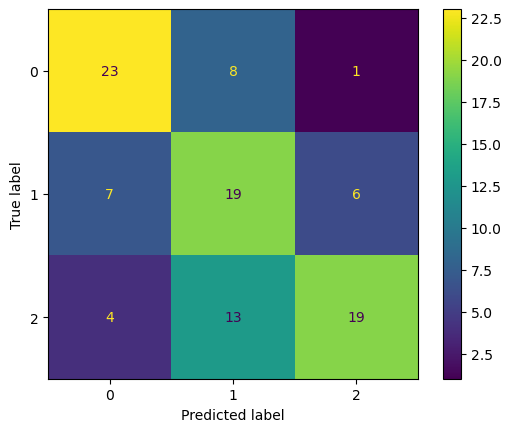

In [321]:
# Confusion matrix for optimal alpha
ConfusionMatrixDisplay(confusion_matrix(test_y, dtc.predict(test_X))).plot()

## Conclusion

Overall, we did not achieve good accuracy, but we ensured that we did not overfit the decision tree by pruning it